In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

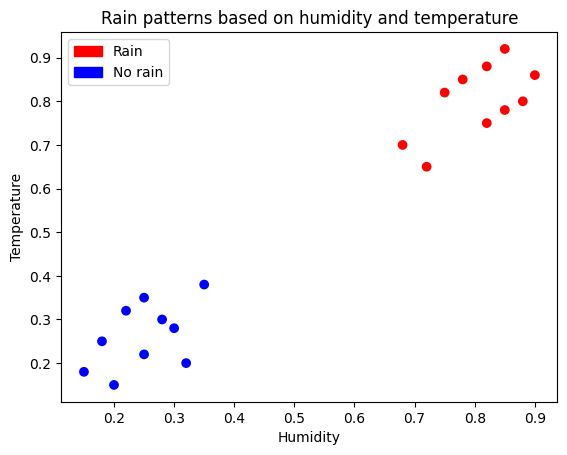

In [152]:
#q1 and q2
def sctplt():
    df_csv = pd.read_csv('Data/WeatherData_Q3.csv')
    x = df_csv["humid"].to_numpy().flatten()
    y = df_csv["temp"].to_numpy().flatten()
    rain = df_csv["rain"].to_numpy().flatten()
    colors = ["red" if i==1 else "blue" for i in rain]
    plt.scatter(x=x, y=y, color = colors)
    plt.xlabel("Humidity")
    plt.ylabel("Temperature")
    red_patch = mpatches.Patch(color='red', label='Rain')
    blue_patch = mpatches.Patch(color='blue', label='No rain')
    plt.title("Rain patterns based on humidity and temperature")
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()
sctplt()

In [123]:
def activation(x):
        return np.where(x > 0 , 1, 0)
class Perceptron:   
    def __init__(self, learningRate=0.1, iters=1000):
        self.lr = learningRate
        self.iteration = iters
        self.activation = activation
        self.weights = None
        self.bias = None
    
    def fit(self, x, y):
        samples, feats = x.shape
        self.weights =np.random.uniform(-0.05,0.05,feats)
        self.bias = 0
        y_= [0]*len(y)
        for i in range(len(y)):
            if y[i] > 0:
                y_[i]=1
            else:
                y_[i] = 0

        # learn weights
        for _ in range(self.iteration):
            for ind, i in enumerate(x):
                output = np.dot(i, self.weights) + self.bias
                yPredicted = self.activation(output)

                # Perceptron update rule
                learn = self.lr * (y_[ind] - yPredicted)
                self.weights += learn * i
                self.bias += learn
                
    def predict(self,x):
        output = np.dot(x, self.weights) + self.bias
        yPredicted = self.activation(output)
        return yPredicted

[1 1 1 1 1]
True, Weather: Rain
True, Weather: Rain
True, Weather: Rain
True, Weather: Rain
True, Weather: Rain


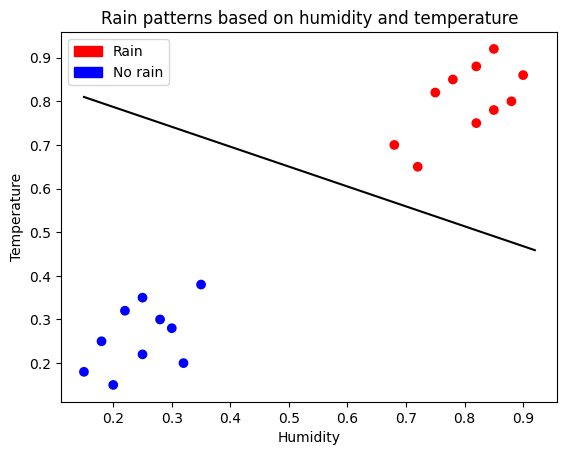

0.92


In [155]:
y = df_csv["rain"].to_numpy().flatten()
x = df_csv[["temp","humid"]].to_numpy()
def test(x,y,size, lr,iters):
    trainX = x[:size]
    testX = x[size:]
    trainY = y[:size]
    testY = y[size:]
    print(testY)
    rainforecast = Perceptron(lr,iters)
    rainforecast.fit(trainX,trainY)
    p = rainforecast.predict(testX)
    for i in range(len(testY)):
        s=""
        if p[i]==testY[i]:
            s+= "True, Weather: "
            if testY[i]==1:
                s+= "Rain"
            else:
                s+="No Rain"
        else:
            s+= "False, Weather: "
            if testY[i]==1:
                s+= "Rain"
            else:
                s+="No Rain"
            
        print(s)
    
    # plt.scatter(trainY[:, 0], trainX[:, 1], marker="o", c=colors)
    x2 = np.amax(x[:, 0])
    x1 = np.amin(x[:, 0])
    
    y1 = (-rainforecast.weights[0] * x1 - rainforecast.bias) / rainforecast.weights[1]
    y2 = (-rainforecast.weights[0] * x2 - rainforecast.bias) / rainforecast.weights[1]

    plt.plot([x1, x2], [y1, y2], "k")
    sctplt()
    ymin = np.amin(trainX[:, 1])
    
    ymax = np.amax(trainX[:, 1])
    print(x2)
    # ax.set_ylim([ymin - 3, ymax + 3])
test15 = test(x,y,15,0.1,1000)



In [ ]:
"""
The perceptron works, it seperates into rain and no rain (0,1).
it works because the data has been cleaned, values are normalized so there's no bias in input data.
also the amount of iterations and high learning rate helps it learn faster, lowering the iterations or the lr significantly drops accuracy
because the given features were so small, a single perceptron worked, but if we wanted more factors into our weather predicter,
we might consider multiperceptron 
"""